In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [20]:
df.drop(columns='Serial No.',axis=1 ,inplace=True)

In [21]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [22]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
X = scaler.fit_transform(X)

In [25]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [26]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size=0.1 ,random_state=0)

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [120]:
model = Sequential()

In [121]:
model.add(Dense(21, activation='relu' ,input_dim = X_train.shape[1]))
model.add(Dense(1 ,activation='linear'))

In [122]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 21)                168       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 22        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [124]:
history = model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=1 ,validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7708 - val_loss: 0.5131
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4042 - val_loss: 0.2645
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2276 - val_loss: 0.1520
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1467 - val_loss: 0.1132
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1110 - val_loss: 0.0921
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0896 - val_loss: 0.0774
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0724 - val_loss: 0.0620
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0588 - val_loss: 0.0518
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0482 - val_loss: 0.0423
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0394 - val_loss: 0.0352
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0065
Epoch 84/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0063
Epoch 85/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0062
Epoch 86/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0063
Epoch 87/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 88/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 89/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 90/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 91/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0061
Epoch 92/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0060
Epoch 93/100


In [125]:
y_pred = model.predict(X_test)

In [126]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6639044699041284

In [127]:
history.history

{'loss': [0.7708313465118408,
  0.404163658618927,
  0.2275962084531784,
  0.1467362344264984,
  0.11104034632444382,
  0.08963770419359207,
  0.07236098498106003,
  0.05879543349146843,
  0.048193641006946564,
  0.03941158950328827,
  0.03276287764310837,
  0.027660241350531578,
  0.023933524265885353,
  0.020852698013186455,
  0.01843002252280712,
  0.016512248665094376,
  0.014826703816652298,
  0.013508401811122894,
  0.012375814840197563,
  0.011421994306147099,
  0.010617573745548725,
  0.009869844652712345,
  0.009260128252208233,
  0.00872123334556818,
  0.008288171142339706,
  0.007874641567468643,
  0.007558569312095642,
  0.007178265135735273,
  0.006948268972337246,
  0.006718447431921959,
  0.00651996023952961,
  0.006313251331448555,
  0.006099794525653124,
  0.006037463899701834,
  0.0058874343521893024,
  0.0057395282201468945,
  0.0056322235614061356,
  0.005549797788262367,
  0.005456911865621805,
  0.005376064218580723,
  0.005346786696463823,
  0.005223055835813284,

In [128]:
import matplotlib.pyplot as plt

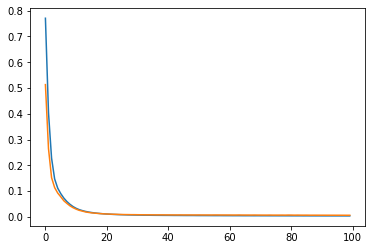

In [129]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])